# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [61]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [62]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


In [63]:
cities

['yellowknife',
 'kodiak',
 'jamestown',
 'cotorra',
 'nouadhibou',
 'nanortalik',
 'rikitea',
 'punta arenas',
 'severo-kurilsk',
 'ushuaia',
 'acari',
 'iqaluit',
 'taolanaro',
 'bilibino',
 'mataura',
 'codrington',
 'upernavik',
 'brainerd',
 'butaritari',
 'timaru',
 'quatre cocos',
 'ternate',
 'hobart',
 'cape town',
 'fairbanks',
 'naples',
 'uvinza',
 'kazalinsk',
 'grand river south east',
 'esmeralda',
 'patrocinio',
 'hermanus',
 'bambous virieux',
 'amga',
 'taungdwingyi',
 'safranbolu',
 'bethel',
 'hilo',
 'guerrero negro',
 'meulaboh',
 'zhitikara',
 'kazerun',
 'thompson',
 'kapaa',
 'mahabaleshwar',
 'noamundi',
 'chuy',
 'provideniya',
 'bredasdorp',
 'buala',
 'pangnirtung',
 'gumushane',
 'barentsburg',
 'vinh',
 'esna',
 'catia la mar',
 'ribeira grande',
 'sentyabrskiy',
 'vao',
 'doctor pedro p. pena',
 'tinguindin',
 'menomonie',
 'pozo colorado',
 'rawannawi',
 'atuona',
 'cidreira',
 'tasiilaq',
 'pacific grove',
 'port alfred',
 'sarahan',
 'busselton',
 'av

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [64]:
# Set the API base URL
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | kodiak
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | cotorra
Processing Record 5 of Set 1 | nouadhibou
Processing Record 6 of Set 1 | nanortalik
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | acari
Processing Record 12 of Set 1 | iqaluit
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | codrington
Processing Record 17 of Set 1 | upernavik
Processing Record 18 of Set 1 | brainerd
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | timaru
Processing Record 21 of Set 1 | quatre cocos
Processing Record 22 of Set 1 | ternate
Proc

In [65]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          532
Lat           532
Lng           532
Max Temp      532
Humidity      532
Cloudiness    532
Wind Speed    532
Country       532
Date          532
dtype: int64

In [66]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-2.66,83,98,3.25,CA,1681348266
1,kodiak,57.7900,-152.4072,7.73,42,0,5.14,US,1681348266
2,jamestown,42.0970,-79.2353,21.77,45,0,5.14,US,1681347990
3,cotorra,9.0389,-75.7897,26.84,87,100,2.77,CO,1681348267
4,nouadhibou,20.9310,-17.0347,18.99,94,75,5.14,MR,1681348267


In [67]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [68]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-2.66,83,98,3.25,CA,1681348266
1,kodiak,57.7900,-152.4072,7.73,42,0,5.14,US,1681348266
2,jamestown,42.0970,-79.2353,21.77,45,0,5.14,US,1681347990
3,cotorra,9.0389,-75.7897,26.84,87,100,2.77,CO,1681348267
4,nouadhibou,20.9310,-17.0347,18.99,94,75,5.14,MR,1681348267


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

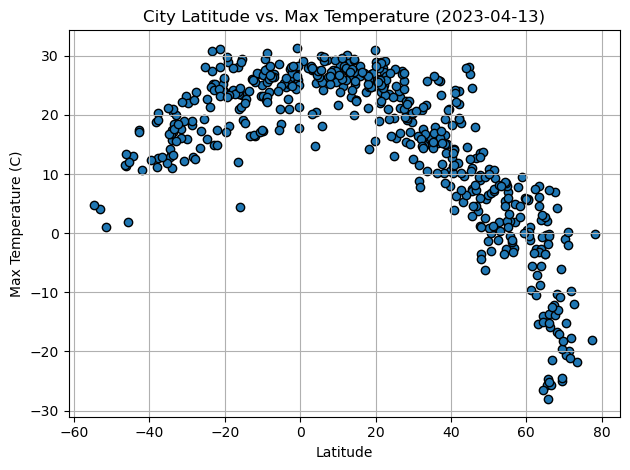

In [69]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

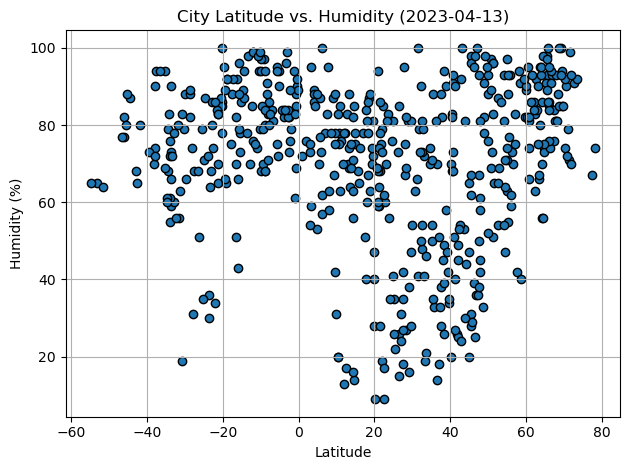

In [70]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude Vs. Cloudiness

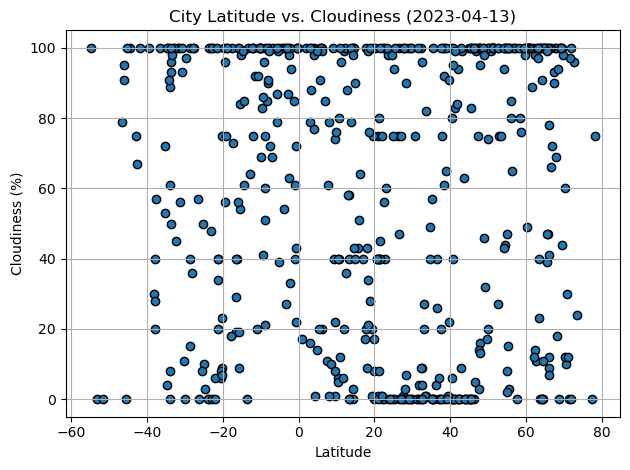

In [71]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.tight_layout()
plt.show()

#### Latitude vs. Wind Speed Plot

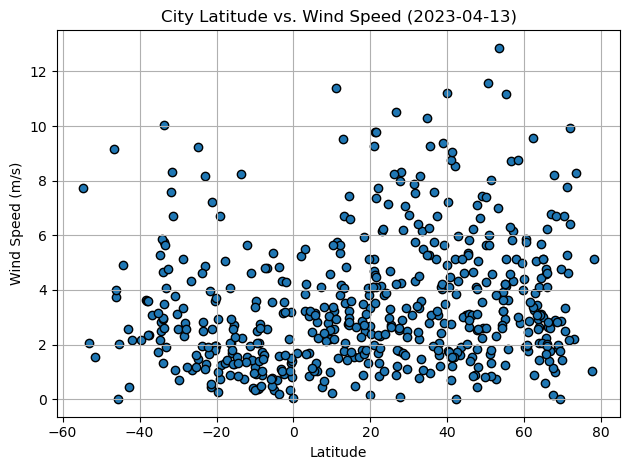

In [72]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({pd.to_datetime(city_data_df['Date'][0], unit='s').strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.tight_layout()
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [130]:
# Define a function to create Linear Regression plots

def linear_regression(x_values,y_values,c_x,c_y):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.ylabel("Max Temp")
    plt.xlabel("Latitude")

    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.annotate(line_eq,(c_x,c_y),fontsize=15,color="red")

    print(f"The r-value is: {rvalue**2}")

    plt.show()

In [74]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-2.66,83,98,3.25,CA,1681348266
1,kodiak,57.7900,-152.4072,7.73,42,0,5.14,US,1681348266
2,jamestown,42.0970,-79.2353,21.77,45,0,5.14,US,1681347990
3,cotorra,9.0389,-75.7897,26.84,87,100,2.77,CO,1681348267
4,nouadhibou,20.9310,-17.0347,18.99,94,75,5.14,MR,1681348267


In [75]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,rikitea,-23.1203,-134.9692,25.28,68,48,4.87,PF,1681348268
7,punta arenas,-53.1500,-70.9167,4.06,65,0,2.06,CL,1681348109
9,ushuaia,-54.8000,-68.3000,4.81,65,100,7.72,AR,1681348269
10,acari,-15.4311,-74.6158,23.33,78,84,1.27,PE,1681348269
13,mataura,-46.1927,168.8643,11.38,77,95,3.74,NZ,1681348270


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7731338954752668


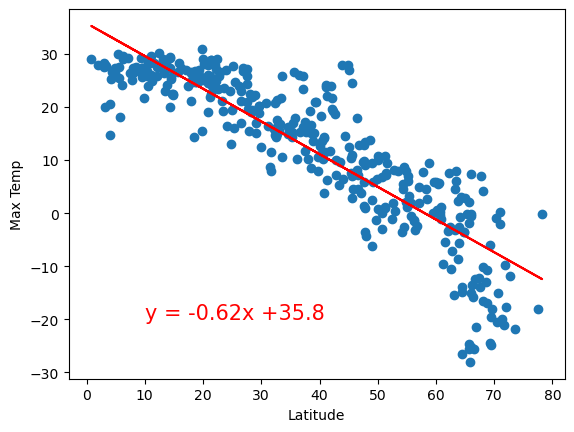

In [131]:
# Linear regression on Northern Hemisphere

linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],10,-20)


The r-value is: 0.48214322172931373


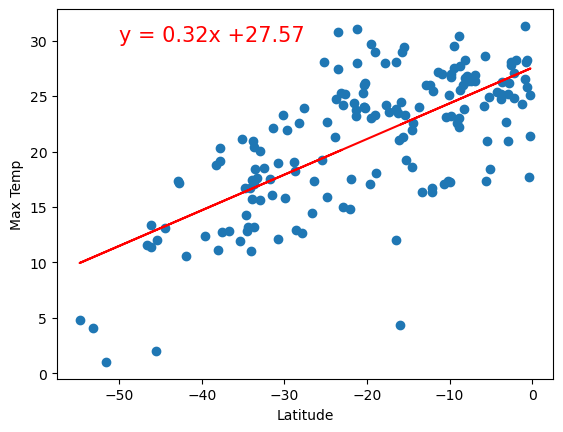

In [133]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],-50,30)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.06764574140576848


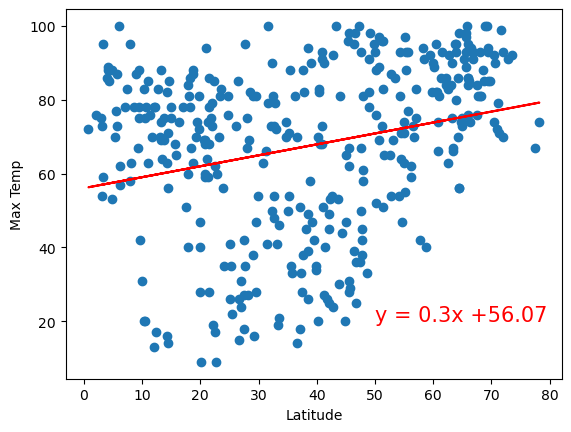

In [135]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],50,20)

The r-value is: 0.10420547729580613


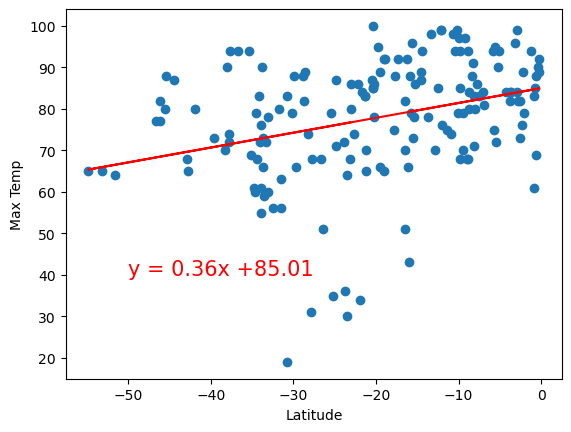

In [136]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],-50,40)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.019534955897342644


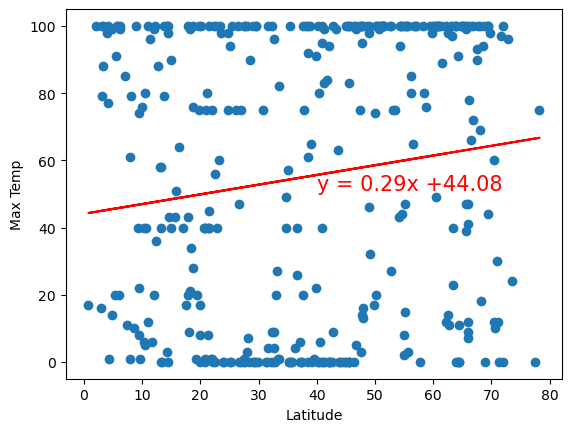

In [140]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],40,51)

The r-value is: 0.02745466488878435


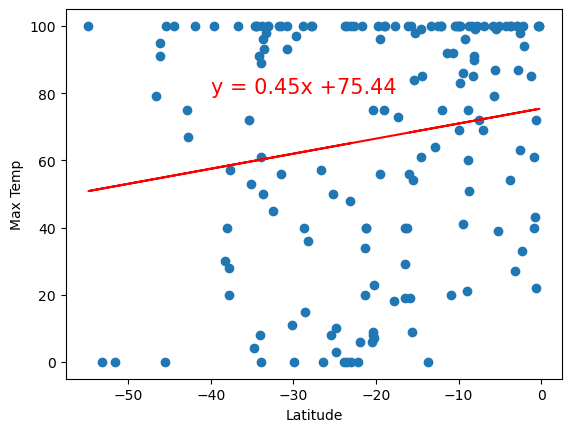

In [141]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],-40,80)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0053012484955715896


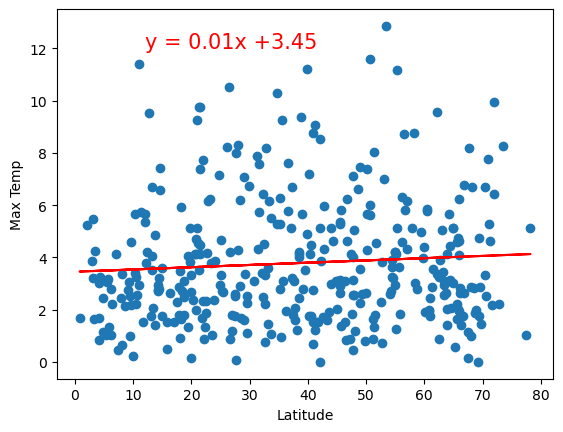

In [142]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],12,12)

The r-value is: 0.10448768320034763


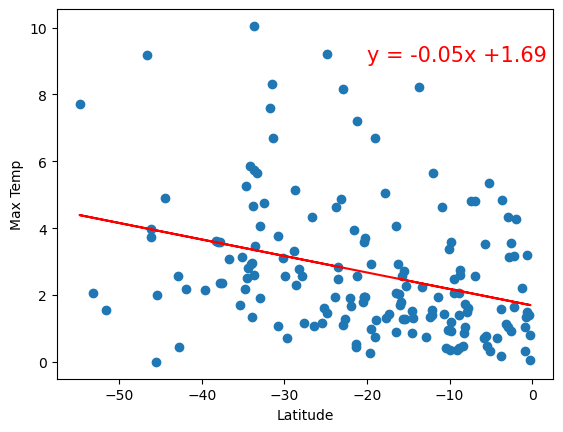

In [144]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],-20,9)

**Discussion about the linear relationship:** YOUR RESPONSE HERE